# Stars DTW

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn import metrics
import os
from sklearn.preprocessing import normalize

In [10]:
os.chdir('../stars_clean_10')

In [11]:
stars_files = [file for file in os.listdir() if 'cleaned.pk1' in file]
stars_files

['adamsmith_stars_cleaned.pk1',
 'embulk_stars_cleaned.pk1',
 'google_stars_cleaned.pk1',
 'guillaume_stars_cleaned.pk1',
 'iven_stars_cleaned.pk1',
 'microsoft_stars_cleaned.pk1',
 'oleiade_stars_cleaned.pk1',
 'pandas_stars_cleaned.pk1',
 'yang_stars_cleaned.pk1',
 'zhn_stars_cleaned.pk1']

In [12]:
# Check shape
for file in stars_files:
    print(file, pd.read_pickle(file).shape)

adamsmith_stars_cleaned.pk1 (167, 6)
embulk_stars_cleaned.pk1 (1324, 6)
google_stars_cleaned.pk1 (18988, 6)
guillaume_stars_cleaned.pk1 (88, 6)
iven_stars_cleaned.pk1 (260, 6)
microsoft_stars_cleaned.pk1 (399, 6)
oleiade_stars_cleaned.pk1 (881, 6)
pandas_stars_cleaned.pk1 (21031, 6)
yang_stars_cleaned.pk1 (9102, 6)
zhn_stars_cleaned.pk1 (451, 6)


In [13]:
adamsmith = pd.read_pickle(stars_files[0])
embulk = pd.read_pickle(stars_files[1])
google = pd.read_pickle(stars_files[2])
guillaume = pd.read_pickle(stars_files[3])
iven = pd.read_pickle(stars_files[4])
microsoft = pd.read_pickle(stars_files[5])
oleiade = pd.read_pickle(stars_files[6])
pandas = pd.read_pickle(stars_files[7])
yang = pd.read_pickle(stars_files[8])
zhn = pd.read_pickle(stars_files[9])

## Monthly Count of Stars

In [14]:
def monthly_count(df):
    
    # Change to pandas datetime object
    df['starredAt'] =  df['starredAt'].apply(pd.Timestamp)
    
    # Group by committedDate's month and get the count
    df_group = df.groupby(df['starredAt'].dt.to_period('M')) \
                                                 .count()['id'] \
                                                 .reset_index() \
                                                 .rename(columns={'id': 'countByMonth'})
    
    # Normalize count and create a insert back into df_group
    df_group['countByMonthNorm'] = normalize([df_group['countByMonth']])[0]
    
    return df_group

In [15]:
adamsmith_star = monthly_count(adamsmith)
embulk_star  = monthly_count(embulk)
google_star  = monthly_count(google)
guillaume_star  = monthly_count(guillaume)
iven_star  = monthly_count(iven)
microsoft_star  = monthly_count(microsoft)
oleiade_star  = monthly_count(oleiade)
pandas_star  = monthly_count(pandas)
yang_star  = monthly_count(yang)
zhn_star  = monthly_count(zhn)

C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)
C:\Users\Dustin\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1172: UserWarning: Convertin

# Dyanmic Time Warping

In [16]:
from tslearn.metrics import dtw_path

In [17]:
monthly_star_list = [adamsmith_star, embulk_star, google_star, guillaume_star, iven_star, microsoft_star, 
                    oleiade_star, pandas_star, yang_star, zhn_star]
monthly_star_list_str = ['adamsmith_star', 'embulk_star', 'google_star', 'guillaume_star', 'iven_star', 'microsoft_star', 
                    'oleiade_star', 'pandas_star', 'yang_star', 'zhn_star']

### Calculate DTW

In [18]:
def calc_dtw(star_num):
    dtw = []
    path = []

    for el in range(len(monthly_star_list)):
        dtw_pathing = dtw_path(monthly_star_list[star_num].iloc[:,-1].tolist(), monthly_star_list[el].iloc[:,-1].tolist())
        dtw.append((monthly_star_list_str[star_num], monthly_star_list_str[el], dtw_pathing[1]))
        path.append((monthly_star_list_str[star_num], monthly_star_list_str[el], dtw_pathing[0]))
        
    return dtw, path

In [19]:
dtw_1, path_1 = calc_dtw(2)

In [20]:
dtw_1

[('google_star', 'adamsmith_star', 1.224497281422738),
 ('google_star', 'embulk_star', 0.9397103163204412),
 ('google_star', 'google_star', 0.0),
 ('google_star', 'guillaume_star', 1.0378922226058602),
 ('google_star', 'iven_star', 0.6575211510202473),
 ('google_star', 'microsoft_star', 0.7475346158121547),
 ('google_star', 'oleiade_star', 0.7136586724127392),
 ('google_star', 'pandas_star', 0.748806999649955),
 ('google_star', 'yang_star', 0.6549485773608568),
 ('google_star', 'zhn_star', 1.1198360210700613)]

### Plot DTW

In [21]:
def plot_graph(dtw, num_dtw, star_num):
    print(dtw[star_num])
    monthly_star_list[num_dtw].plot(x='starredAt', y='countByMonthNorm')
    monthly_star_list[star_num].plot(x='starredAt', y='countByMonthNorm')

('google_star', 'pandas_star', 0.748806999649955)


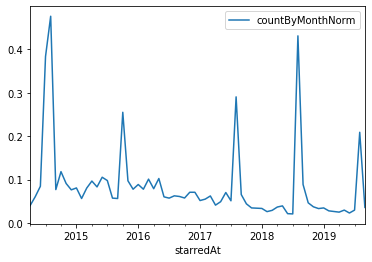

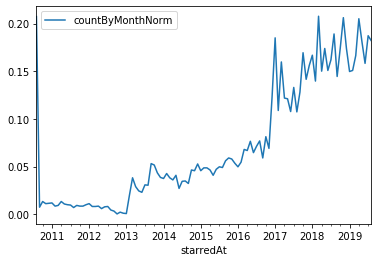

In [22]:
plot_graph(dtw_1, 2, 7)

### Make dictionary

In [23]:
def make_dict(num):
    
    dtw_1, path_1 = calc_dtw(num)
    my_dict = {dtw_1[i][1]:dtw_1[i][2] for i in range(len(dtw_1))}
    
    return my_dict

In [24]:
adamsmith_dict = make_dict(0)
embulk_dict = make_dict(1)
google_dict = make_dict(2)
guillaume_dict = make_dict(3)
iven_dict = make_dict(4)
microsoft_dict = make_dict(5)
oleiade_dict = make_dict(6)
pandas_dict = make_dict(7)
yang_dict = make_dict(8)
zhn_dict = make_dict(9)

dict_list = [adamsmith_dict, embulk_dict, google_dict, guillaume_dict, iven_dict, 
             microsoft_dict, oleiade_dict, pandas_dict, yang_dict, zhn_dict]

### Make a DF

In [25]:
df = pd.Series()
for el in range(len(dict_list)):
    df = pd.concat([df, pd.Series(dict_list[el], name=monthly_star_list_str[el])], axis=1)
df = df.drop(columns=0)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
df

,adamsmith_star,embulk_star,google_star,guillaume_star,iven_star,microsoft_star,oleiade_star,pandas_star,yang_star,zhn_star
adamsmith_star,0.000000,0.499393,1.224497,0.308630,1.306346,0.995110,1.109341,1.076215,1.096712,0.467932
embulk_star,0.499393,0.000000,0.939710,0.335108,1.030166,0.835905,0.931150,0.748143,0.851699,0.225486
google_star,1.224497,0.939710,0.000000,1.037892,0.657521,0.747535,0.713659,0.748807,0.654949,1.119836
guillaume_star,0.308630,0.335108,1.037892,0.000000,1.115906,0.905295,0.997194,0.922322,0.959202,0.369980
iven_star,1.306346,1.030166,0.657521,1.115906,0.000000,0.398503,0.545225,0.700290,0.419541,1.180207
microsoft_star,0.995110,0.835905,0.747535,0.905295,0.398503,0.000000,0.388870,0.959875,0.425012,0.949369
oleiade_star,1.109341,0.931150,0.713659,0.997194,0.545225,0.388870,0.000000,1.150649,0.572147,1.050151
pandas_star,1.076215,0.748143,0.748807,0.922322,0.700290,0.959875,1.150649,0.000000,0.855419,0.989844
yang_star,1.096712,0.851699,0.654949,0.959202,0.419541,0.425012,0.572147,0.855419,0.000000,1.028610
zhn_star,0.467932,0.225486,1.119836,0.369980,1.180207,0.949369,1.050151,0.989844,1.028610,0.000000


In [18]:
df.to_csv('stars_dtw.csv', index=False)

# [Hiearchical Clustering](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


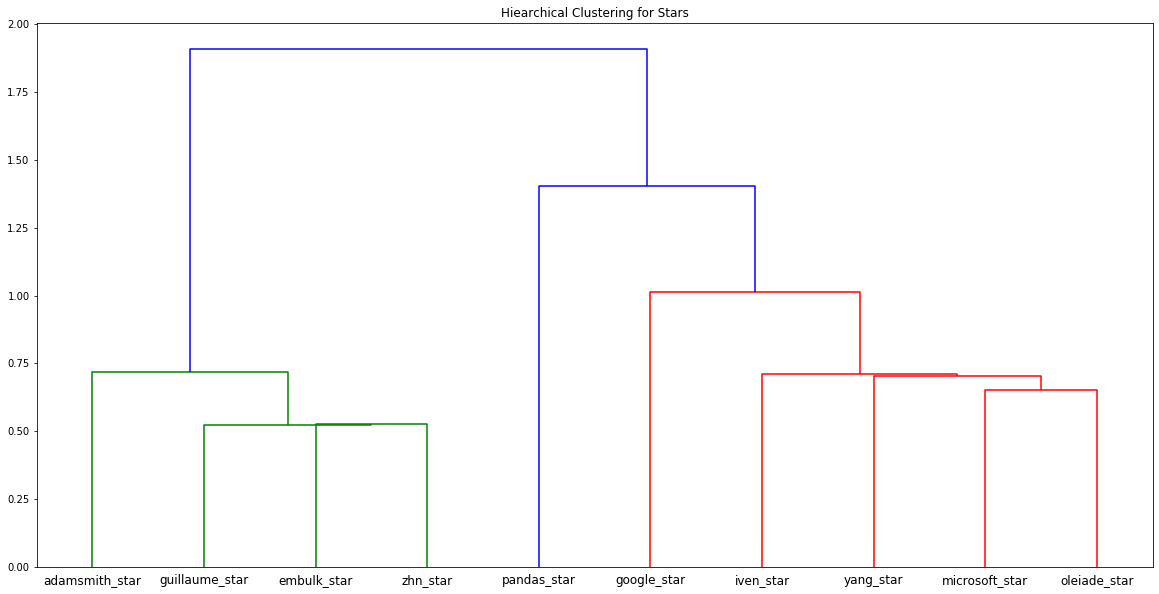

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(df.as_matrix(), 'centroid')
labelList = df.index

plt.figure(figsize=(20, 10))
plt.title('Hiearchical Clustering for Stars')
dend = dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
#plt.show()

# [Agglomerative Clustering](https://medium.com/@sametgirgin/hierarchical-clustering-model-in-5-steps-with-python-6c45087d4318)

C:\Users\Dustin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\Dustin\Anaconda3\lib\site-packages\scipy\cluster\hierarchy.py:878: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


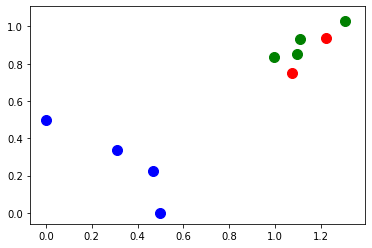

In [37]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

X = df.as_matrix()

y = hc.fit_predict(X)

plt.scatter(X[y==0, 0], X[y==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], s=100, c='green', label ='Cluster 3')

In [34]:
y

array([1, 1, 0, 1, 2, 2, 2, 0, 2, 1], dtype=int64)

In [35]:
df.columns

Index(['adamsmith_star', 'embulk_star', 'google_star', 'guillaume_star',
       'iven_star', 'microsoft_star', 'oleiade_star', 'pandas_star',
       'yang_star', 'zhn_star'],
      dtype='object')

### Test Moving Average

In [21]:
def moving_average(values, window):
    weights = np.repeat(1, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [22]:
moving_average(pandas_star['countByMonthNorm'].tolist(), 3).shape

(107,)

In [23]:
y = moving_average(embulk_star['countByMonthNorm'].tolist(), 20)

In [24]:
x = [i for i in range(len(y))]

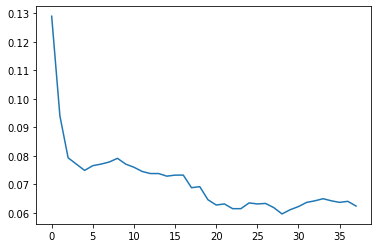

In [25]:
plt.plot(x, y)

In [26]:
pandas_star.head()

,starredAt,countByMonth,countByMonthNorm
0,2010-08,558,0.207399
1,2010-09,20,0.007434
2,2010-10,36,0.013381
3,2010-11,30,0.011150
4,2010-12,31,0.011522


In [27]:
x = moving_average(zhn_star['countByMonthNorm'].tolist(), 10)
x1 = [i for i in range(len(x))]
y = moving_average(embulk_star['countByMonthNorm'].tolist(), 10)
y1 = [i for i in range(len(y))]
dtw_path(x,y)[1]

0.12660061096626146

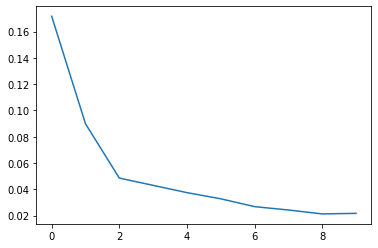

In [28]:
plt.plot(x1, x)

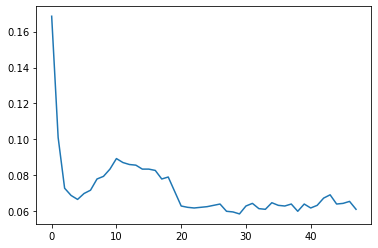

In [29]:
plt.plot(y1, y)